<a href="https://colab.research.google.com/github/daradaaryan/Accuracy-and-Applications-of-Probablistic-Data-Structures/blob/main/HyperLogLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0
1
2
3
4
5
6
7
8


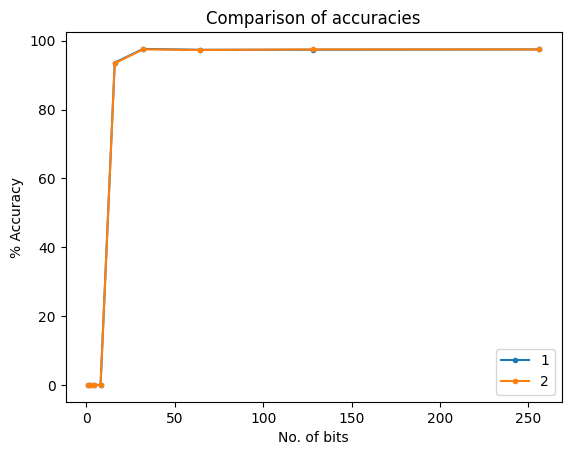

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


class HyperLogLog:

  def __init__(self, b):
    self.m = 2**b
    self.M = [0] * self.m
    self.alpha = self.get_alpha()
    self.b = b

  def get_alpha(self):
    if self.m == 16:
      return 0.673
    elif self.m == 32:
      return 0.697
    elif self.m == 64:
      return 0.709
    else:
      return 0.7213 / (1 + 1.079 / self.m)

  def add(self, x):
    h = hash(x)
    j = h & (self.m - 1)
    w = h >> self.b
    self.M[j] = max(self.M[j], self.rho(w))

  def rho(self, w):
    try:
      return bin(w)[::-1].index('1') + 1
    except ValueError:
      return 0

  def count(self):
    estimate = self.alpha * self.m**2 / sum([2**(-m) for m in self.M])
    if estimate <= 2.5 * self.m:
      zeros = self.M.count(0)
      if zeros != 0:
        return round(self.m * math.log(self.m / zeros))
      else:
        return round(estimate)
    elif estimate <= (1 / 30) * 2**32:
      return round(estimate)
    else:
      return -2**32 * math.log(1 - estimate / 2**32)


def test_accuracy():
  b = 10  # number of bits
  num_sets = 100  # number of sets to generate and test
  errors = []
  errors2 = []
  for j in range(9):
    values = []
    for i in range(num_sets):
      s = set(random.randint(0, 2**(2**j) - 1) for _ in range(10000))
      hll = HyperLogLog(b)
      for x in s:
        hll.add(x)

      actual_cardinality = len(s)
      estimated_cardinality = hll.count()
      error = abs(actual_cardinality -
                  estimated_cardinality) / actual_cardinality
      values.append(error)
      V2 = []
      for k in range(int(len(values)*(0.7))+1):
        V2.append(values[k])
    errors.append(np.array(values).mean())
   
    print(j)
    errors2.append(np.array(V2).mean()) 
  plt.plot(np.exp2(range(9)), (1-np.array(errors))*100, marker='.', label='1')
  # plt.scatter(np.exp2(range(9)), (1-np.array(errors))*100)
  plt.plot(np.exp2(range(9)), (1-np.array(errors2))*100, marker='.', label='2')
  # plt.scatter(np.exp2(range(9)), (1-np.array(errors2))*100)
  plt.title("Comparison of accuracies")
  plt.xlabel("No. of bits")
  plt.ylabel("% Accuracy")
  plt.legend()
  plt.show()

test_accuracy()
